# **Method of Moments, Maximum Likelihood Estimation of Height and finding Confidence Interval with Bootstrap Method**

# **0.0 Imports**

**0.1 Imports**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

**0.2 Support Functions**

In [4]:
import io
from google.colab import files

# **1.0 Data Description**

**1.1 Loading Data**

In [5]:
uploaded = files.upload()

Saving cardio_base.csv to cardio_base.csv


In [6]:
df = pd.read_csv(io.BytesIO(uploaded['cardio_base.csv']))

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [8]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0
69999,99999,20540,1,170,72.0,120,80,2,0


**1.2 Column Description**


*   ***id:*** gives the id of subject/sample
*   ***gender:*** gives the gender of sample as *(1-male, 2-female)*
*   ***height:*** gives height of sample in centimeter
*   ***weight:*** gives weight in kilogram
*   ***ap_hi***: gives high blood pressure at time of sampling
*   ***ap-lo:*** gives low blood pressure at time of sampling
*   ***cholestrol:*** signifies whether sample has cholestrol as *(1-having, 0-not having)*
*   ***smoke:*** signifies whether sample smokes as *(1-smoker, 0-non smoker)*












**1.3 Data Types and Structure**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


# **2.0 Selecting column**

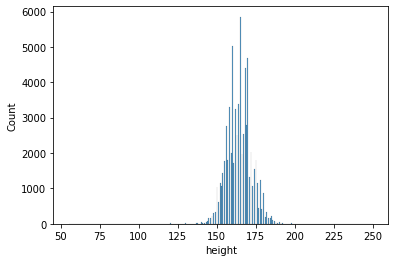

In [49]:
sns.histplot(df['height'])

**2.1 Selecting and Visualizing Sample**

In [50]:
z=df['height'].sample(10000)

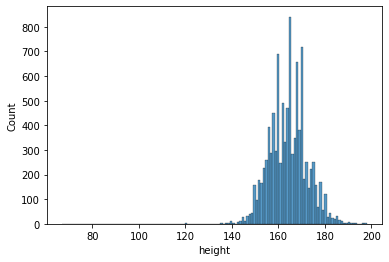

In [51]:
x=np.array(z)
p=sns.histplot(x)
p.set(xlabel='height')
plt.show()

# **3.0 Fit a Statistical Model**

**3.1 Normal Distribution**

In [44]:
loc,scale=norm.fit(x)

In [45]:
sample=np.array([i for i in range(0,200)])

In [46]:
pdf=norm.pdf(sample,loc,scale)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


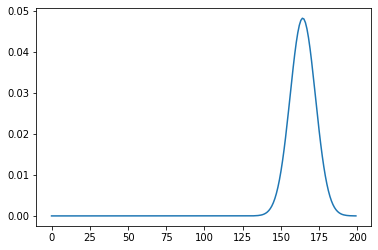

In [47]:
sns.lineplot(sample,pdf)

**3.2 Visually Comparing the Distribution Fit**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


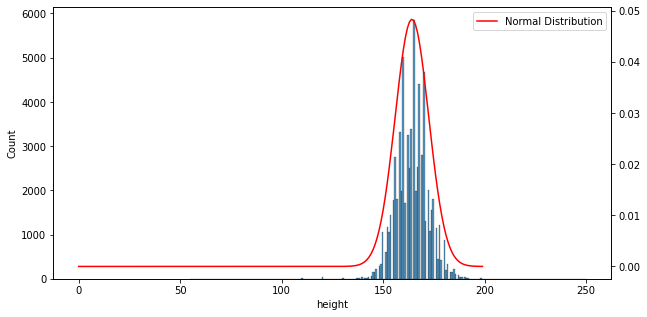

In [48]:
fig=plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax2 = ax1.twinx()
sns.histplot(df['height'],bins=250,ax=ax1)
sns.lineplot(sample,pdf,ax=ax2,label='Normal Distribution',color='r')
plt.legend()
plt.show()

# **4.0 Finding Estimators**

**4.1 Estimation using Method of Moments (MoM)**

$\mu_{mm}=\frac{\sum_{i=1}^n x_i}{n}$

$\sigma^2_{mm}=\frac{\sum_{i=1}^n x^{2}_i}{n} - \mu^2_{mm}$

In [43]:
#Method of Moments
Mu_mm= np.sum(x)/10000 #Mean
variance_mm=(np.sum(np.square(x))/10000)-Mu_mm**2 #Variance
print('Method of Moments:\nMean={}, variance={}, std.dev={}'.format(Mu_mm,variance_mm,variance_mm**0.5))

Method of Moments:
Mean=164.2378, variance=68.24025116000121, std.dev=8.260765773219891


**4.2 Estimation using Maximum Likelihood Estimation (MLE)**

$\mu_{MLE}=\frac{\sum_{i=1}^n x_i}{n}$


$\sigma^2_{MLE}= \frac{Σ(x_i-\mu_{MLE})^2}{n}$

In [42]:
#Maximum Likelihood
Mu_ml=np.sum(x)/10000 #Mean
p=[Mu_ml for i in range(0,10000)] 
variance_ml= np.sum(np.square(np.subtract(x,p)))/10000 #variance
print('Maximum Likelihood Estimation:\nMean={}, variance={}, std.dev={}'.format(Mu_ml,variance_ml,variance_ml**0.5))

Maximum Likelihood Estimation:
Mean=164.2378, variance=68.24025116000001, std.dev=8.260765773219818


# **5.0 Confidence Interval with Bootstrap Method**

**5.1 Resampling Mean and Variance using MLE Estimates**

In [25]:
MU,VAR=[],[]
for i in range(10000):
    r = norm.rvs(loc=Mu_ml,scale=variance_ml**0.5,size=10000) # To generate normal distribution samples
    mu=np.average(r) #Mean of generated sample
    va=np.var(r) #Variance of generated sample
    #Storing Mean and Variance into arrays
    MU.append(mu)
    VAR.append(va)

In [26]:
print(np.var(MU),np.var(VAR))

0.006811935294161365 0.9120592696412344


**5.2 Finding Confidence Intervals of Mean**

In [35]:
m1=np.percentile(np.array(MU) - Mu_mm, 97.5)
print('97.5th percentile:',m1)

97.5th percentile: 0.1653915073457426


In [36]:
m2=np.percentile(np.array(MU) - Mu_mm, 2.5)
print('2.5th percentile:',m2)

2.5th percentile: -0.15847669526060953


In [37]:
print('confidence intervals of mean: [{},{}]'.format(Mu_mm-m1,Mu_mm-m2))

confidence intervals of mean: [164.07240849265426,164.3962766952606]


**5.3 Finding Confidence Intervals of Variance**

In [38]:
v1=np.percentile(np.array(VAR) - variance_mm, 97.5)
print('97.5th percentile:',v1)

97.5th percentile: 1.8904675243372715


In [39]:
v2=np.percentile(np.array(VAR) - variance_mm, 2.5)
print('2.5th Percentile:',v2)

2.5th Percentile: -1.8669880589302117


In [40]:
print('confidence intervals of variance: [{},{}]'.format(variance_mm-v1,variance_mm-v2))

confidence intervals of variance: [66.34978363566394,70.10723921893143]
